In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(tf. __version__)

2.16.1


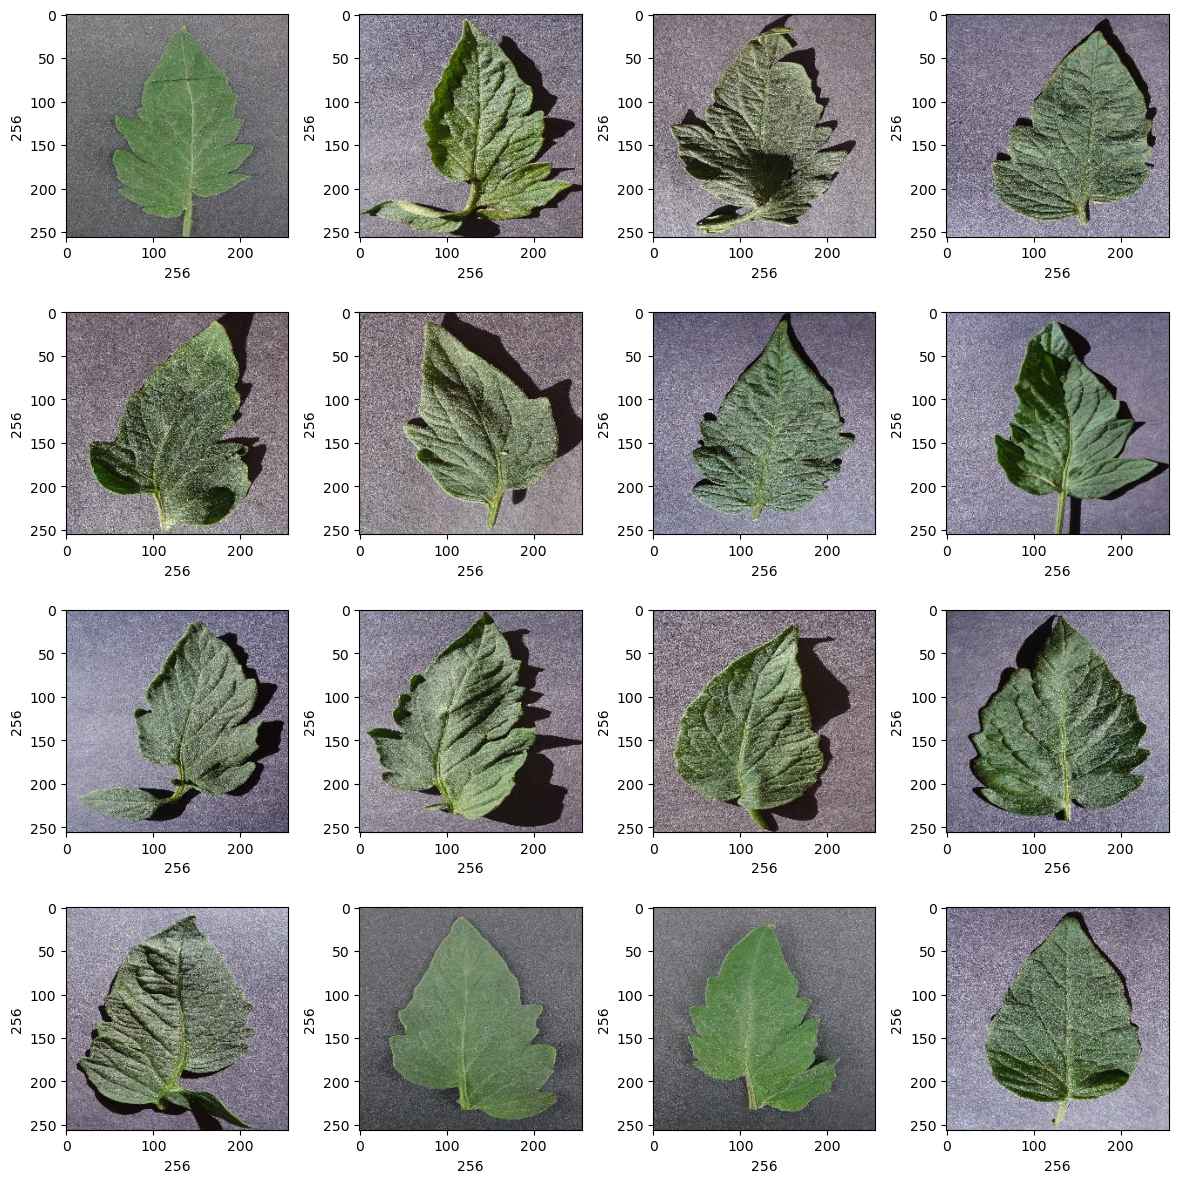

In [4]:
plt.figure(figsize=(12,12))
path="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color/Tomato___healthy"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

In [6]:
dir="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color"
image_list,label_list=[],[]
all_labels=['Tomato_Bacterial_spot','Tomato_healthy','Tomato_mosaic_virus']
binary_labels=[0,1,2]
temp=-1

for directory in ['Tomato___Bacterial_spot','Tomato___healthy','Tomato___Tomato_mosaic_virus']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

0    2127
1    1591
2     373
Name: count, dtype: int64

In [8]:
image_list

[array([[[143., 143., 149.],
         [145., 145., 151.],
         [147., 147., 153.],
         ...,
         [155., 153., 159.],
         [153., 151., 157.],
         [152., 150., 156.]],
 
        [[146., 146., 152.],
         [146., 146., 152.],
         [148., 148., 154.],
         ...,
         [154., 152., 158.],
         [154., 152., 158.],
         [154., 152., 158.]],
 
        [[148., 148., 154.],
         [148., 148., 154.],
         [148., 148., 154.],
         ...,
         [153., 151., 157.],
         [154., 152., 158.],
         [154., 152., 158.]],
 
        ...,
 
        [[111., 110., 120.],
         [108., 107., 117.],
         [107., 106., 116.],
         ...,
         [111., 109., 115.],
         [109., 107., 113.],
         [116., 114., 120.]],
 
        [[112., 111., 121.],
         [109., 108., 118.],
         [108., 107., 117.],
         ...,
         [115., 113., 119.],
         [115., 113., 119.],
         [115., 113., 119.]],
 
        [[112., 111., 121.],
 

In [9]:
x_train,x_test,y_train,y_test= train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [10]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [11]:
x_train[0].shape

(256, 256, 3)

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         225,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="categorial_crossentropy",optimizer=Adam(0.0001),metrics=["accuracy"])

In [15]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs=50
batch_size=128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4431 - loss: 1.1275 - val_accuracy: 0.7863 - val_loss: 0.6745
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8047 - loss: 0.5731 - val_accuracy: 0.8824 - val_loss: 0.3090
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 969ms/step - accuracy: 0.8937 - loss: 0.2833 - val_accuracy: 0.9511 - val_loss: 0.1932
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 995ms/step - accuracy: 0.9636 - loss: 0.1609 - val_accuracy: 0.9634 - val_loss: 0.1392
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 992ms/step - accuracy: 0.9758 - loss: 0.0918 - val_accuracy: 0.9649 - val_loss: 0.0939
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 941ms/step - accuracy: 0.9902 - loss: 0.0499 - val_accuracy: 0.9725 - val_loss: 0.0908
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 954ms/step - accuracy: 0.9899 - loss: 0.0397 - val_accuracy: 0.9725 - val_loss: 0.0814
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 926ms/step - accuracy: 0.9920 - loss: 0.0339 - val_accuracy: 

In [28]:
model.save=("C:/Users/PC-ACER/DataScience/Project/Plant Disease Detection/Models/tomato_plant_disease_model.h5")

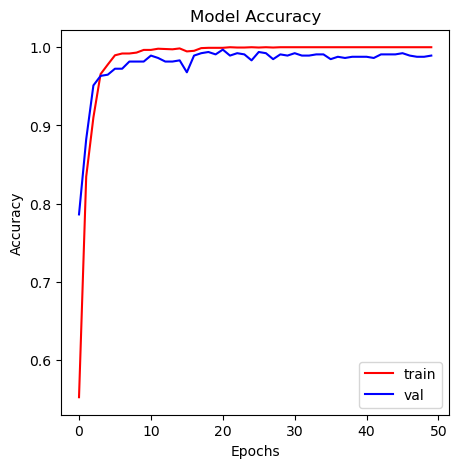

In [19]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],color="r")
plt.plot(history.history["val_accuracy"],color="b")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

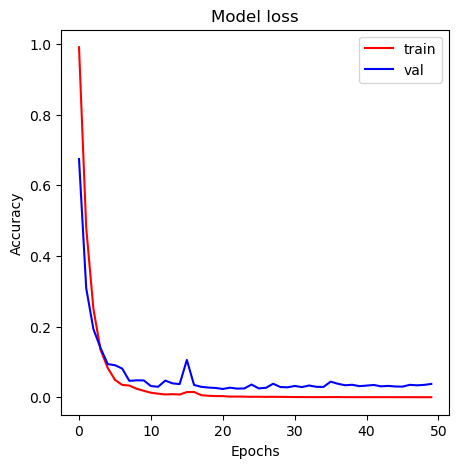

In [20]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],color="r")
plt.plot(history.history["val_loss"],color="b")
plt.title("Model loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

In [21]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9968 - loss: 0.0221
Test Accuracy: 99.51159954071045


In [22]:
y_pred=model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


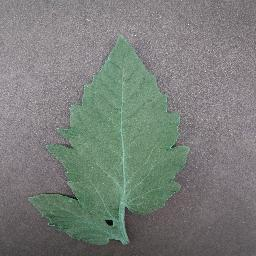

In [23]:
img=array_to_img(x_test[11])
img

In [24]:
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Tomato_healthy
Predicted Label:  Tomato_Bacterial_spot
[6.834800e-08 9.999999e-01 6.994731e-09]


In [29]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])

Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_healthy - Tomato_healthy
Tomato_healthy - Tomato_healthy
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_mosaic_virus - Tomato_mosaic_virus
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_healthy - Tomato_healthy
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_mosaic_virus - Tomato_mosaic_virus
Tomato_mosaic_virus - Tomato_mosaic_virus
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_healthy - Tomato_healthy
Tomato_healthy - Tomato_healthy
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_healthy - Tomato_healthy
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_Bacterial_spot - Tomato_Bacterial_spot
Tomato_healthy - Tomato_healthy
Tomato